In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. EDA

In [2]:
df = pd.read_csv("/content/drive/MyDrive/TNT/산업인공지능/실습/Task4/hourly_electricity.csv")
df.head()

,Unnamed: 0,power_usage,t,days_from_start,categorical_id,date,id,hour,day,day_of_week,month,hours_from_start,categorical_day_of_week,categorical_hour
0,17544,2.538071,26304.0,1096,MT_001,2014-01-01 00:00:00,MT_001,0,1,2,1,26304.0,2,0
1,17545,2.855330,26305.0,1096,MT_001,2014-01-01 01:00:00,MT_001,1,1,2,1,26305.0,2,1
2,17546,2.855330,26306.0,1096,MT_001,2014-01-01 02:00:00,MT_001,2,1,2,1,26306.0,2,2
3,17547,2.855330,26307.0,1096,MT_001,2014-01-01 03:00:00,MT_001,3,1,2,1,26307.0,2,3
4,17548,2.538071,26308.0,1096,MT_001,2014-01-01 04:00:00,MT_001,4,1,2,1,26308.0,2,4


In [3]:
df.tail()

,Unnamed: 0,power_usage,t,days_from_start,categorical_id,date,id,hour,day,day_of_week,month,hours_from_start,categorical_day_of_week,categorical_hour
2198067,10461482,20824.324324,32299.0,1345,MT_370,2014-09-07 19:00:00,MT_370,19,7,6,9,32299.0,6,19
2198068,10461483,19527.027027,32300.0,1345,MT_370,2014-09-07 20:00:00,MT_370,20,7,6,9,32300.0,6,20
2198069,10461484,20202.702703,32301.0,1345,MT_370,2014-09-07 21:00:00,MT_370,21,7,6,9,32301.0,6,21
2198070,10461485,19851.351351,32302.0,1345,MT_370,2014-09-07 22:00:00,MT_370,22,7,6,9,32302.0,6,22
2198071,10461486,20135.135135,32303.0,1345,MT_370,2014-09-07 23:00:00,MT_370,23,7,6,9,32303.0,6,23


In [4]:
print(df['Unnamed: 0'].value_counts().sort_index())
print(df['t'].value_counts().sort_index())
print(df['days_from_start'].value_counts().sort_index())
print(df['categorical_id'].value_counts().sort_index())
print(df['date'].value_counts().sort_index())

17544       1
17545       1
17546       1
17547       1
17548       1
           ..
10461482    1
10461483    1
10461484    1
10461485    1
10461486    1
Name: Unnamed: 0, Length: 2198072, dtype: int64
26304.0    350
26305.0    350
26306.0    350
26307.0    350
26308.0    350
          ... 
32299.0    369
32300.0    369
32301.0    369
32302.0    369
32303.0    369
Name: t, Length: 6000, dtype: int64
1096    8400
1097    8400
1098    8400
1099    8400
1100    8400
        ... 
1341    8856
1342    8856
1343    8856
1344    8856
1345    8856
Name: days_from_start, Length: 250, dtype: int64
MT_001    6000
MT_002    6000
MT_003    6000
MT_004    6000
MT_005    6000
          ... 
MT_366    6000
MT_367    6000
MT_368    6000
MT_369    6000
MT_370    6000
Name: categorical_id, Length: 369, dtype: int64
2014-01-01 00:00:00    350
2014-01-01 01:00:00    350
2014-01-01 02:00:00    350
2014-01-01 03:00:00    350
2014-01-01 04:00:00    350
                      ... 
2014-09-07 19:00:00    369
201

In [5]:
print(sum(df['categorical_id'] != df['id']))
print(sum(df['t'] != df['hours_from_start']))

0
0


In [6]:
df.drop(['Unnamed: 0', 't', 'days_from_start', 'categorical_id', 'hours_from_start'], axis = 1, inplace = True)

In [7]:
df.head()

,power_usage,date,id,hour,day,day_of_week,month,categorical_day_of_week,categorical_hour
0,2.538071,2014-01-01 00:00:00,MT_001,0,1,2,1,2,0
1,2.855330,2014-01-01 01:00:00,MT_001,1,1,2,1,2,1
2,2.855330,2014-01-01 02:00:00,MT_001,2,1,2,1,2,2
3,2.855330,2014-01-01 03:00:00,MT_001,3,1,2,1,2,3
4,2.538071,2014-01-01 04:00:00,MT_001,4,1,2,1,2,4


In [8]:
# 시간
print(df['hour'].unique())
print(df['day'].unique())
print(df['day_of_week'].unique())
print(df['month'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
[2 3 4 5 6 0 1]
[1 2 3 4 5 6 7 8 9]


In [9]:
print(df['hour'].value_counts().sort_index())
print(df['day'].value_counts().sort_index())
print(df['day_of_week'].value_counts().sort_index())
print(df['month'].value_counts().sort_index())

# 기록에 빠진 날짜가 있나?

0     91586
1     91586
2     91586
3     91586
4     91586
5     91586
6     91586
7     91586
8     91586
9     91586
10    91586
11    91586
12    91586
13    91586
14    91586
15    91586
16    91587
17    91587
18    91587
19    91587
20    91587
21    91587
22    91587
23    91587
Name: hour, dtype: int64
1     78912
2     78912
3     78912
4     78936
5     78960
6     78960
7     78960
8     70104
9     70104
10    70104
11    70104
12    70128
13    70136
14    70416
15    70416
16    70416
17    70440
18    70512
19    70512
20    70512
21    70512
22    70512
23    70512
24    70512
25    70512
26    70512
27    70512
28    70512
29    61728
30    61728
31    44064
Name: day, dtype: int64
0    307656
1    307992
2    316440
3    316448
4    316512
5    316512
6    316512
Name: day_of_week, dtype: int64
1    265512
2    244800
3    273392
4    264960
5    273792
6    264960
7    274128
8    274536
9     61992
Name: month, dtype: int64


In [10]:
print(sum(df['hour'] != df['categorical_hour']))
print(sum(df['day_of_week'] != df['categorical_day_of_week']))

0
0


In [11]:
df.drop(['categorical_hour', 'categorical_day_of_week'], axis = 1, inplace = True)

In [12]:
df.head()

,power_usage,date,id,hour,day,day_of_week,month
0,2.538071,2014-01-01 00:00:00,MT_001,0,1,2,1
1,2.855330,2014-01-01 01:00:00,MT_001,1,1,2,1
2,2.855330,2014-01-01 02:00:00,MT_001,2,1,2,1
3,2.855330,2014-01-01 03:00:00,MT_001,3,1,2,1
4,2.538071,2014-01-01 04:00:00,MT_001,4,1,2,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198072 entries, 0 to 2198071
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   power_usage  float64
 1   date         object 
 2   id           object 
 3   hour         int64  
 4   day          int64  
 5   day_of_week  int64  
 6   month        int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 117.4+ MB


In [14]:
df.isnull().sum()

power_usage    0
date           0
id             0
hour           0
day            0
day_of_week    0
month          0
dtype: int64

In [15]:
from datetime import datetime, timedelta

def is_next_time(pre_time, now_time):
  return pre_time + timedelta(hours = 1) == now_time

In [16]:
from tqdm import tqdm

disconnection = []

for i in tqdm(range(len(df))):
  if i == 0: continue
  pre = datetime(int(df.iloc[i-1, 1][:4]), df.iloc[i-1, 6], df.iloc[i-1, 4], df.iloc[i-1, 3])
  now = datetime(int(df.iloc[i, 1][:4]), df.iloc[i, 6], df.iloc[i, 4], df.iloc[i, 3])
  if is_next_time(pre, now) == False: disconnection.append(i)

100%|██████████| 2198072/2198072 [07:44<00:00, 4731.14it/s]


In [17]:
disconnection

[6000,
 12000,
 18000,
 24000,
 30000,
 36000,
 42000,
 48000,
 54000,
 60000,
 66000,
 72000,
 78000,
 84000,
 90000,
 96000,
 102000,
 108000,
 114000,
 120000,
 126000,
 132000,
 138000,
 144000,
 150000,
 156000,
 162000,
 168000,
 174000,
 180000,
 186000,
 192000,
 198000,
 204000,
 210000,
 216000,
 222000,
 228000,
 234000,
 240000,
 246000,
 252000,
 258000,
 264000,
 270000,
 276000,
 282000,
 288000,
 294000,
 300000,
 306000,
 312000,
 318000,
 324000,
 330000,
 336000,
 342000,
 348000,
 354000,
 360000,
 366000,
 372000,
 378000,
 384000,
 390000,
 396000,
 402000,
 408000,
 414000,
 420000,
 426000,
 432000,
 438000,
 444000,
 450000,
 456000,
 462000,
 468000,
 474000,
 480000,
 486000,
 492000,
 498000,
 504000,
 510000,
 516000,
 522000,
 528000,
 534000,
 540000,
 546000,
 552000,
 558000,
 564000,
 570000,
 576000,
 582000,
 588000,
 594000,
 600000,
 606000,
 612000,
 618000,
 624000,
 630000,
 635688,
 641376,
 647064,
 651912,
 657600,
 663288,
 668280,
 673968,


In [18]:
df.iloc[disconnection[0]-1:disconnection[0]+1]

,power_usage,date,id,hour,day,day_of_week,month
5999,16.497462,2014-09-07 23:00:00,MT_001,23,7,6,9
6000,24.004267,2014-01-01 00:00:00,MT_002,0,1,2,1


In [19]:
df.iloc[disconnection[1]-1:disconnection[1]+1]

,power_usage,date,id,hour,day,day_of_week,month
11999,31.650071,2014-09-07 23:00:00,MT_002,23,7,6,9
12000,0.434405,2014-01-01 00:00:00,MT_003,0,1,2,1


In [20]:
MT_list = df['id'].unique()
MT_list

array(['MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005', 'MT_006',
       'MT_007', 'MT_008', 'MT_009', 'MT_010', 'MT_011', 'MT_012',
       'MT_013', 'MT_014', 'MT_015', 'MT_016', 'MT_017', 'MT_018',
       'MT_019', 'MT_020', 'MT_021', 'MT_022', 'MT_023', 'MT_024',
       'MT_025', 'MT_026', 'MT_027', 'MT_028', 'MT_029', 'MT_030',
       'MT_031', 'MT_032', 'MT_033', 'MT_034', 'MT_035', 'MT_036',
       'MT_037', 'MT_038', 'MT_039', 'MT_040', 'MT_041', 'MT_042',
       'MT_043', 'MT_044', 'MT_045', 'MT_046', 'MT_047', 'MT_048',
       'MT_049', 'MT_050', 'MT_051', 'MT_052', 'MT_053', 'MT_054',
       'MT_055', 'MT_056', 'MT_057', 'MT_058', 'MT_059', 'MT_060',
       'MT_061', 'MT_062', 'MT_063', 'MT_064', 'MT_065', 'MT_066',
       'MT_067', 'MT_068', 'MT_069', 'MT_070', 'MT_071', 'MT_072',
       'MT_073', 'MT_074', 'MT_075', 'MT_076', 'MT_077', 'MT_078',
       'MT_079', 'MT_080', 'MT_081', 'MT_082', 'MT_083', 'MT_084',
       'MT_085', 'MT_086', 'MT_087', 'MT_088', 'MT_089', 'MT_0

In [21]:
MT_start = []

for id in df['id'].unique():
  MT_start.append(np.where(df['id'] == id)[0][0])

In [22]:
print(len(MT_start))
print(len(disconnection))

369
368


In [23]:
MT_start[1:] == disconnection

True

Plot power_usage

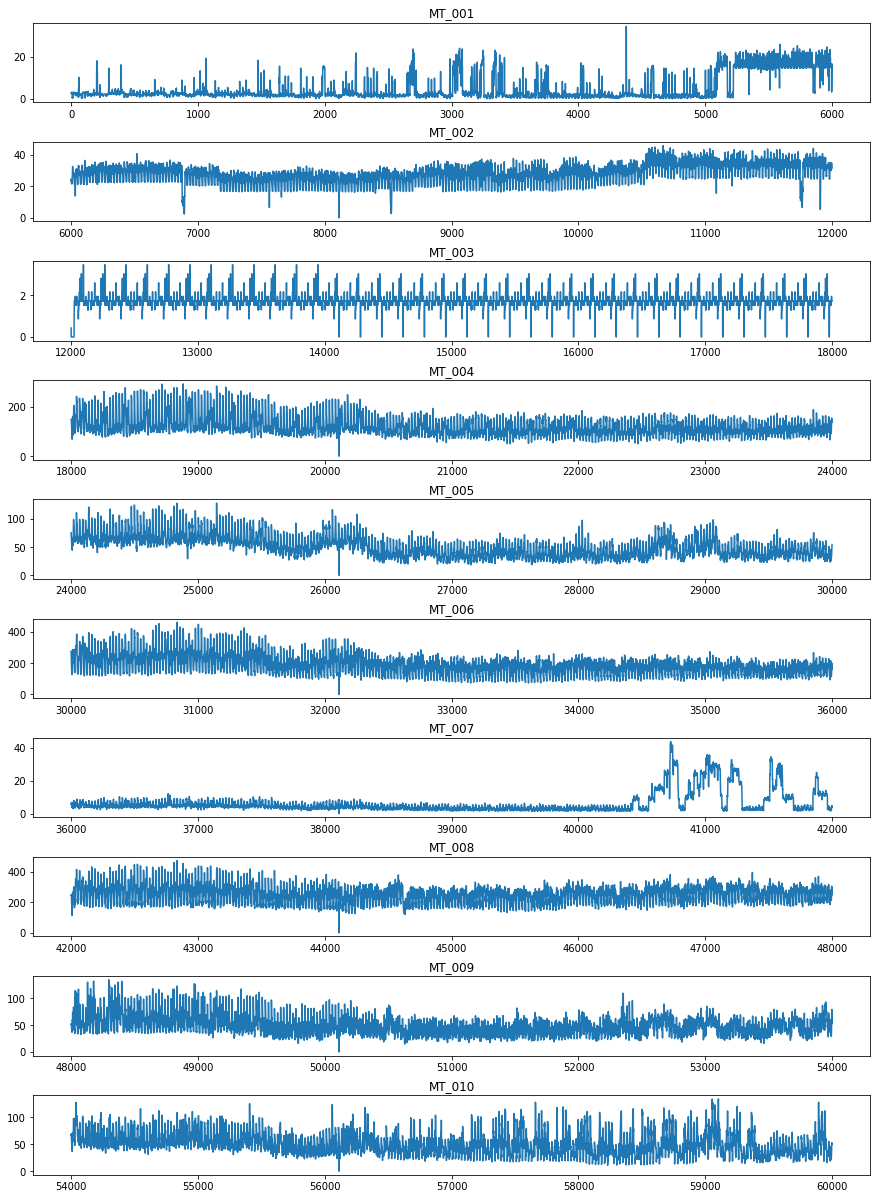

In [24]:
# MT

fig, axes = plt.subplots(10, 1, figsize = (15, 20))

for i in range(10):
  axes[i].plot(df[df['id'] == MT_list[i]]['power_usage'])
  axes[i].set_title(MT_list[i])

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)

plt.show()

In [25]:
def make_stat_df(df, col, start, end):
  data_df = pd.DataFrame(columns = ['max', 'min', 'avg', 'std'])
  for i in range(start, end + 1):
    try:
      data = df[df[col] == i].power_usage
      data_df.loc[i] = [max(data), min(data), np.average(data),  np.std(data)]
    except:
      continue

  return data_df

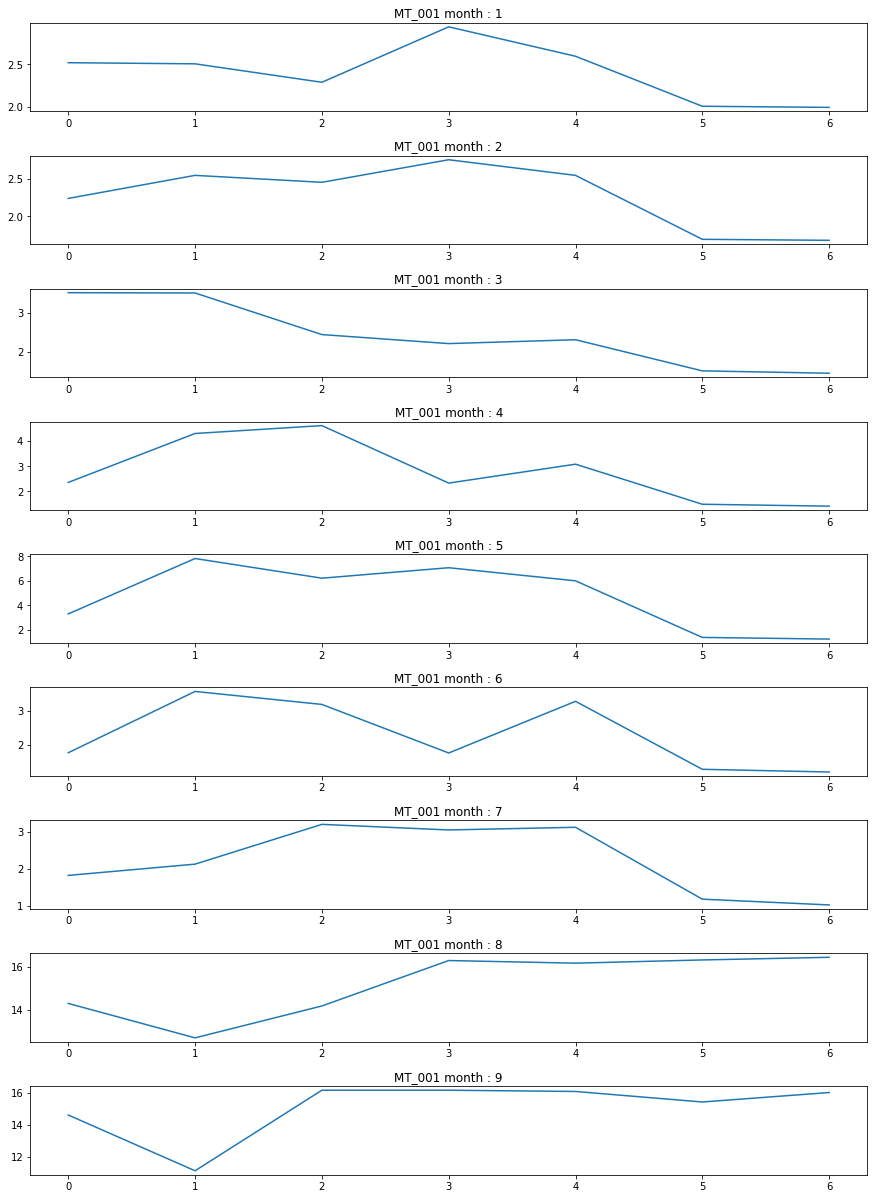

In [26]:
# 요일별
import warnings
warnings.filterwarnings(action='ignore')

fig, axes = plt.subplots(9, 1, figsize = (15, 20))

for i in range(1, 10):
  days = make_stat_df(df[df['id'] == MT_list[0]][df['month'] == i], 'day_of_week', 0, 6)
  axes[i-1].plot(days.avg)
  axes[i-1].set_title(MT_list[0] + " month : " + str(i))

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)

plt.show()

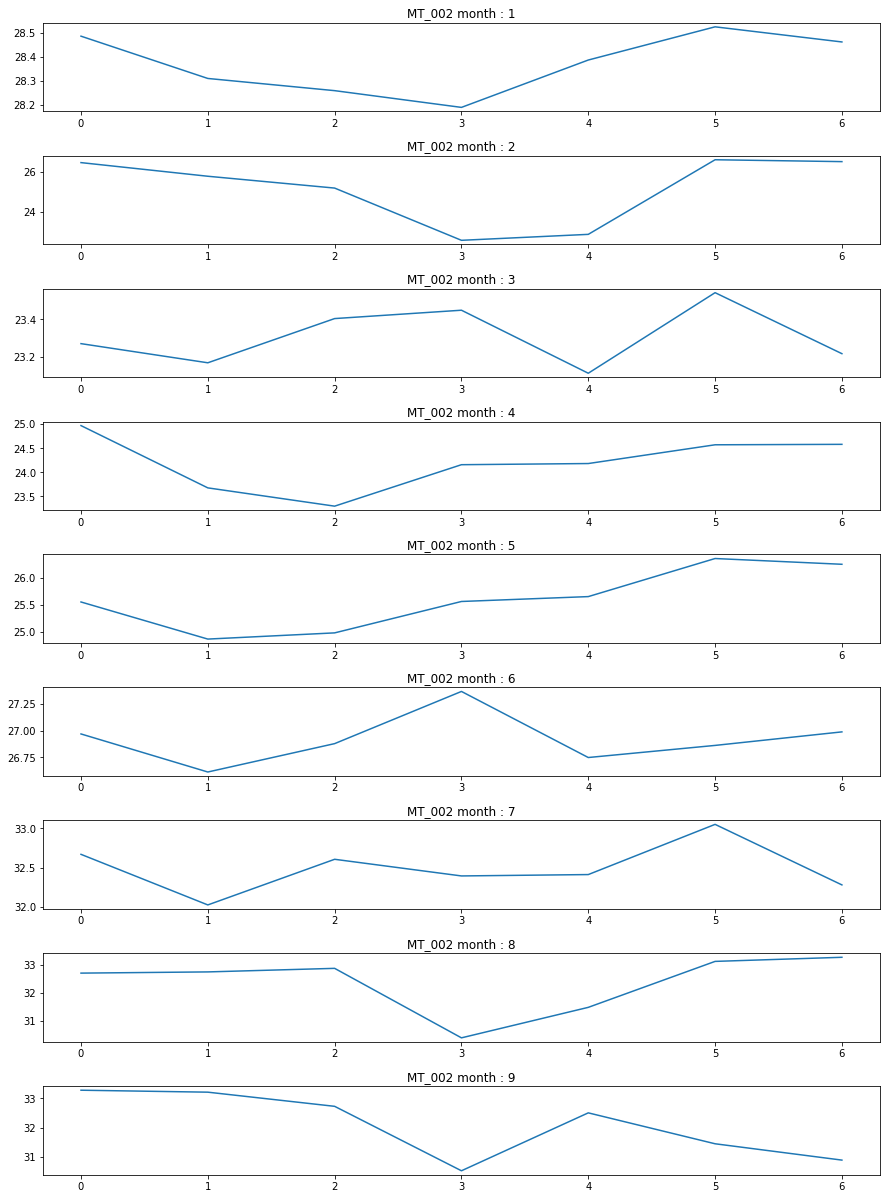

In [27]:
fig, axes = plt.subplots(9, 1, figsize = (15, 20))

for i in range(1, 10):
  days = make_stat_df(df[df['id'] == MT_list[1]][df['month'] == i], 'day_of_week', 0, 6)
  axes[i-1].plot(days.avg)
  axes[i-1].set_title(MT_list[1] + " month : " + str(i))

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)

plt.show()

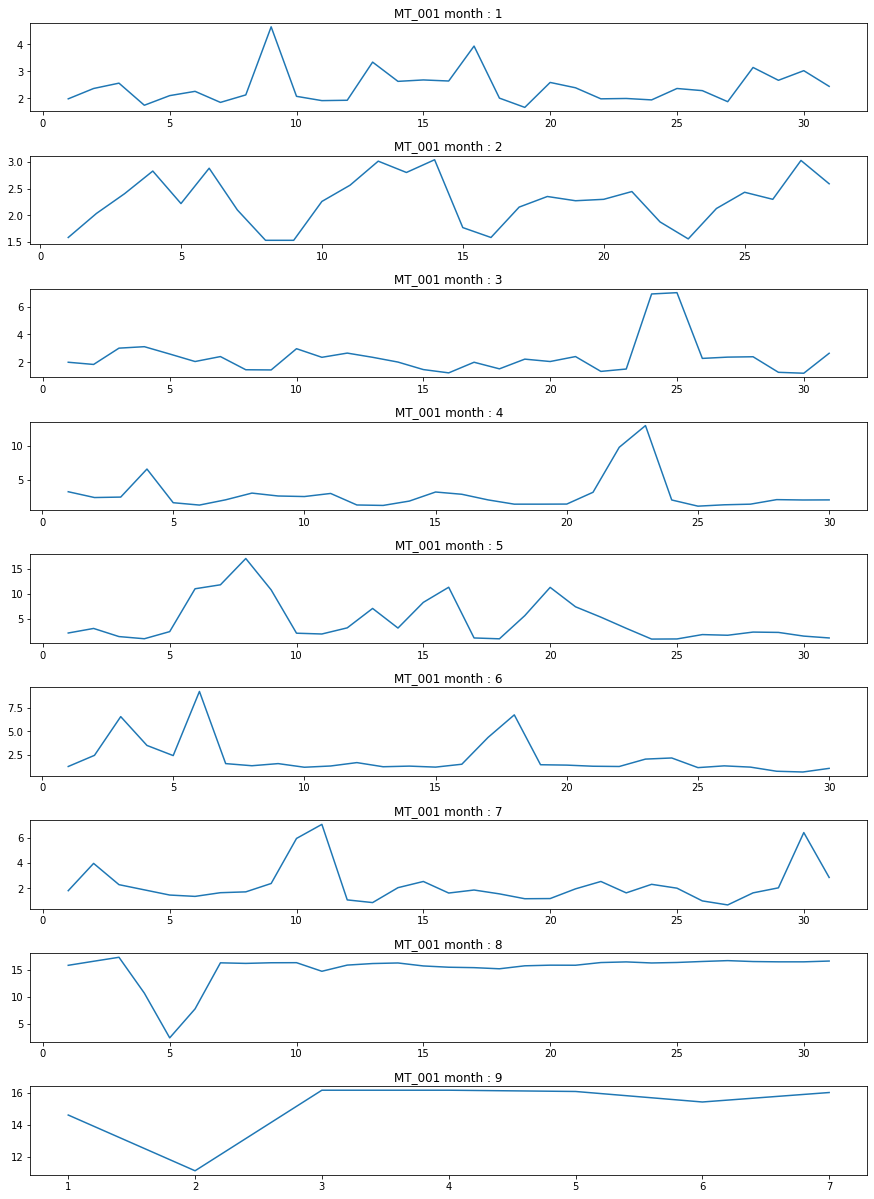

In [28]:
# 일별

fig, axes = plt.subplots(9, 1, figsize = (15, 20))

for i in range(1, 10):
  days = make_stat_df(df[df['id'] == MT_list[0]][df['month'] == i], 'day', 1, 31)
  axes[i-1].plot(df[df['id'] == MT_list[0]][df['month'] == i]['day'].unique(), days.avg)
  axes[i-1].set_title(MT_list[0] + " month : " + str(i))

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)

plt.show()

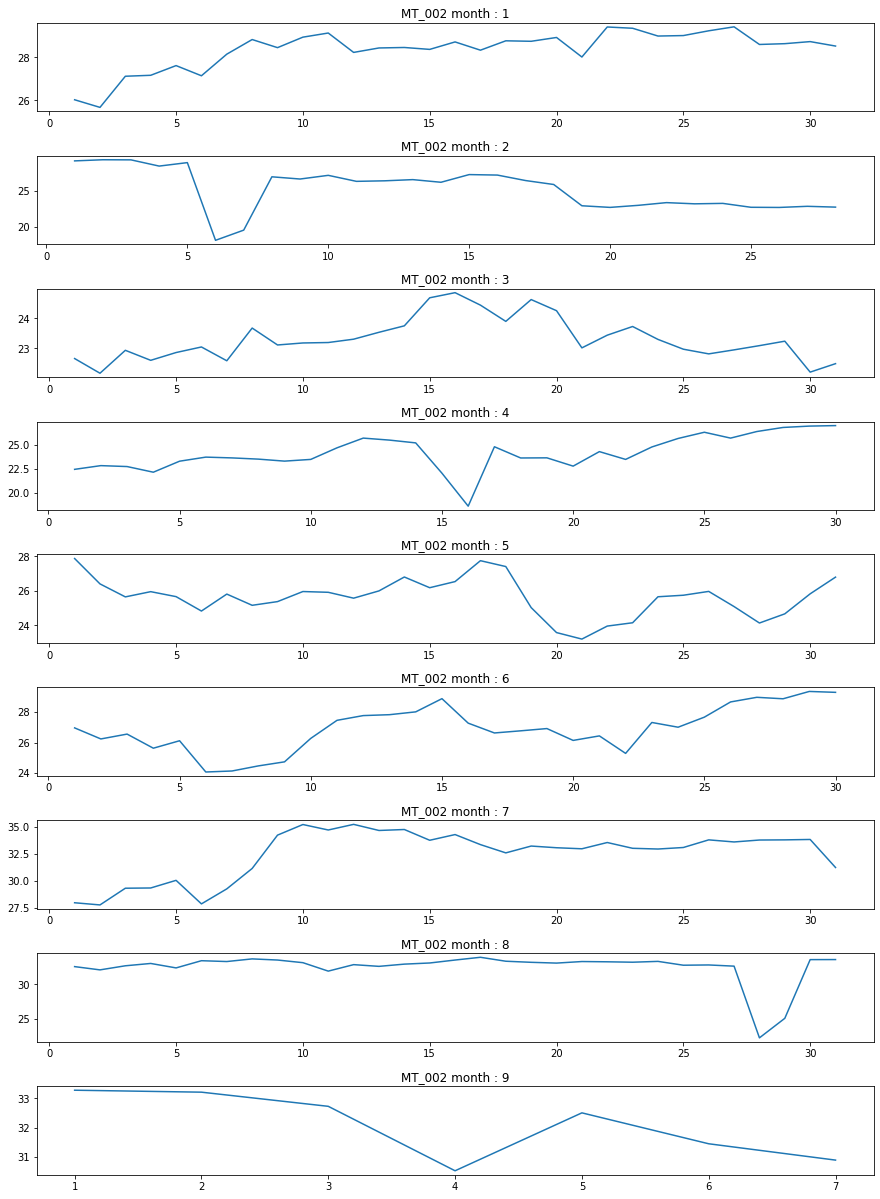

In [29]:
fig, axes = plt.subplots(9, 1, figsize = (15, 20))

for i in range(1, 10):
  days = make_stat_df(df[df['id'] == MT_list[1]][df['month'] == i], 'day', 1, 31)
  axes[i-1].plot(df[df['id'] == MT_list[1]][df['month'] == i]['day'].unique(), days.avg)
  axes[i-1].set_title(MT_list[1] + " month : " + str(i))

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)

plt.show()

In [30]:
# 시간별

hours = make_stat_df(df, 'hour', 0, 23)
hours

,max,min,avg,std
0,48700.000000,0.0,430.817012,1965.426991
1,35550.000000,0.0,361.685840,1548.584080
2,25775.000000,0.0,348.727940,1470.393301
3,25297.297297,0.0,338.513821,1406.936264
4,24459.459459,0.0,331.011721,1340.884904
5,25810.810811,0.0,349.010164,1429.351214
6,24270.270270,0.0,388.255831,1524.777400
7,25121.621622,0.0,428.476242,1615.551539
8,25027.027027,0.0,463.929164,1753.478892
9,80150.000000,0.0,608.027206,2840.115644


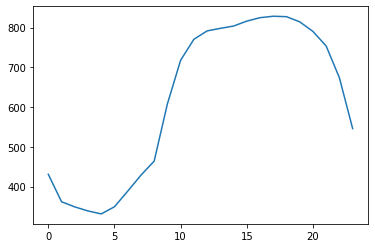

In [31]:
plt.plot(hours.avg)

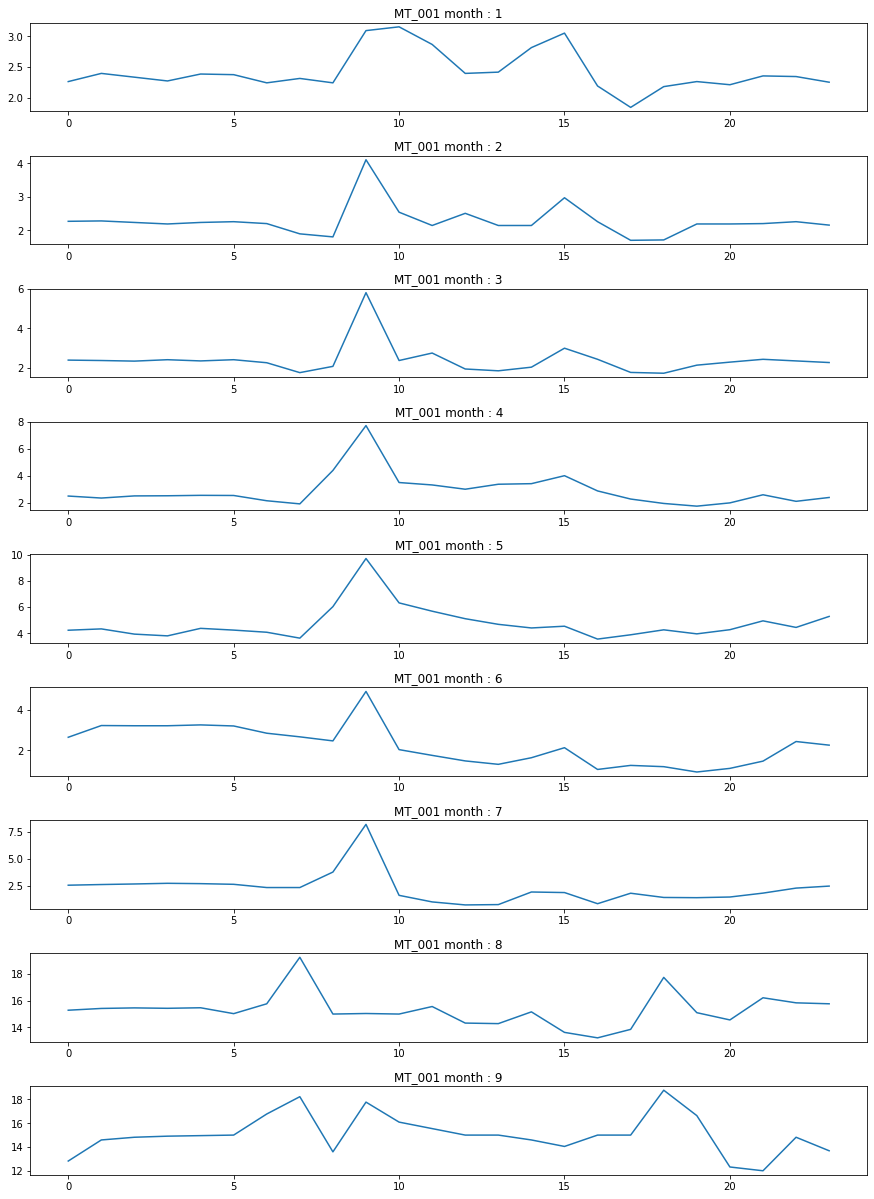

In [32]:
fig, axes = plt.subplots(9, 1, figsize = (15, 20))

for i in range(1, 10):
  hours = make_stat_df(df[df['id'] == MT_list[0]][df['month'] == i], 'hour', 0, 23)
  axes[i-1].plot(df[df['id'] == MT_list[0]][df['month'] == i]['hour'].unique(), hours.avg)
  axes[i-1].set_title(MT_list[0] + " month : " + str(i))

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)

plt.show()

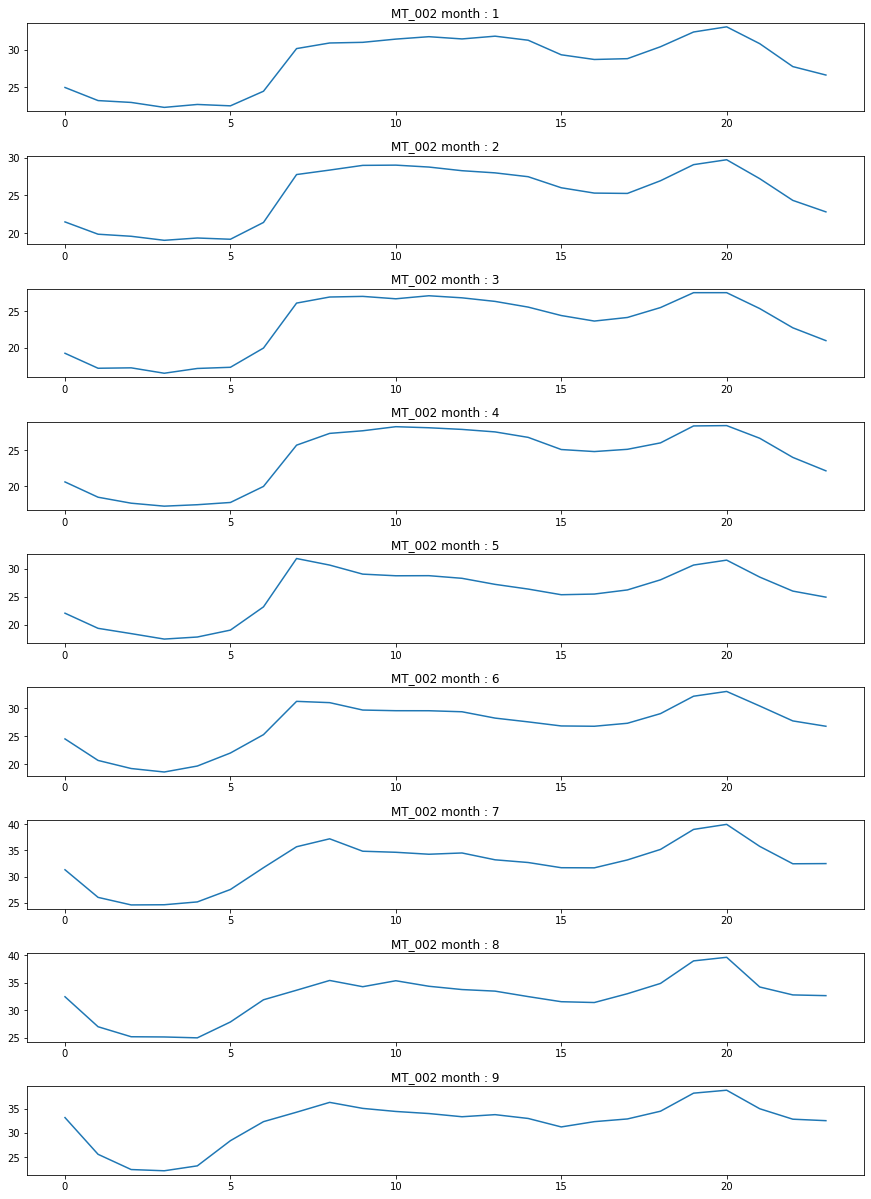

In [33]:
fig, axes = plt.subplots(9, 1, figsize = (15, 20))

for i in range(1, 10):
  hours = make_stat_df(df[df['id'] == MT_list[1]][df['month'] == i], 'hour', 0, 23)
  axes[i-1].plot(df[df['id'] == MT_list[1]][df['month'] == i]['hour'].unique(), hours.avg)
  axes[i-1].set_title(MT_list[1] + " month : " + str(i))

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)

plt.show()

In [34]:
df.head()

,power_usage,date,id,hour,day,day_of_week,month
0,2.538071,2014-01-01 00:00:00,MT_001,0,1,2,1
1,2.855330,2014-01-01 01:00:00,MT_001,1,1,2,1
2,2.855330,2014-01-01 02:00:00,MT_001,2,1,2,1
3,2.855330,2014-01-01 03:00:00,MT_001,3,1,2,1
4,2.538071,2014-01-01 04:00:00,MT_001,4,1,2,1


In [35]:
df.drop(['date', 'day_of_week', 'day'], axis = 1, inplace = True)

In [36]:
df.head()

,power_usage,id,hour,month
0,2.538071,MT_001,0,1
1,2.855330,MT_001,1,1
2,2.855330,MT_001,2,1
3,2.855330,MT_001,3,1
4,2.538071,MT_001,4,1


# 2. 전처리

In [37]:
df['id'] = df['id'].apply(lambda id: int(id[-3:]))

In [38]:
df.head()

,power_usage,id,hour,month
0,2.538071,1,0,1
1,2.855330,1,1,1
2,2.855330,1,2,1
3,2.855330,1,3,1
4,2.538071,1,4,1


In [39]:
df.tail()

,power_usage,id,hour,month
2198067,20824.324324,370,19,9
2198068,19527.027027,370,20,9
2198069,20202.702703,370,21,9
2198070,19851.351351,370,22,9
2198071,20135.135135,370,23,9


In [40]:
from sklearn.preprocessing import MinMaxScaler

def make_data(df, length, jump):
  x = []
  y = []

  for j in tqdm(range(len(id_list))):
    df2 = df[df['id'] == id_list[j]].reset_index()
    data_num = int((len(df2) - (length - 1))/jump)
    for i in range(data_num):
      scalar = MinMaxScaler()
      temp = scalar.fit_transform(df2['power_usage'][i*jump:i*jump+length].values.reshape(-1, 1))
      temp = np.squeeze(temp)
      temp = np.append(temp, np.array([df2['hour'][i*jump+length]]))
      temp = np.append(temp, np.array([id_list[j]]))

      x.append(temp)
      y.append(np.squeeze(scalar.transform(df2['power_usage'][i*jump+length].reshape(-1, 1))))
    
  x = np.array(x)
  y = np.array(y)
  return x, y

In [41]:
id_list = df['id'].unique()

In [42]:
length = 120
jump = 2

# train 1~7월, test 8~9월
train_x, train_y = make_data(df[df['month'] <= 7], length, jump)
test_x, test_y = make_data(df[df['month'] > 7], length, jump)

100%|██████████| 369/369 [00:55<00:00,  6.69it/s]


In [43]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(908632, 122)
(908632,)
(146124, 122)
(146124,)


In [44]:
import random

# shuffle
tmp = [[x,y] for x, y in zip(train_x, train_y)]
random.shuffle(tmp)

In [45]:
train_x = [n[0] for n in tmp]
train_y = [n[1] for n in tmp]

# 3. 모델 학습 및 분석

In [46]:
import xgboost
import time 
start = time.time() 

model = xgboost.XGBRegressor(tree_method = 'auto', objective ='reg:squarederror')
model.fit(train_x,train_y)
end = time.time() 
print(f"{end - start:.5f} sec")

1956.04974 sec


In [47]:
from sklearn.metrics import mean_squared_error

preds = model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.099094


In [48]:
!pip install shap

     |████████████████████████████████| 371 kB 7.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509229 sha256=44128b9bc2a58e409142c994a25d05b34ba4cf987075f995b171044ae75928f7
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [49]:
import shap
# SHAP의 설명체를 정의하고 섀플리 값을 계산하는 로직

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_x)

In [52]:
columns = list(range(120, 0, -1))
columns.append('hour')
columns.append('id')

In [53]:
train_x_df = pd.DataFrame(train_x, columns = columns)
train_x_df.head()

,120,119,118,117,116,115,114,113,112,111,110,109,108,107,106,105,104,103,102,101,100,99,98,97,96,95,94,93,92,91,90,89,88,87,86,85,84,83,82,81,...,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,hour,id
0,0.846695,0.721519,0.226442,0.052039,0.021097,0.019691,0.022504,0.019691,0.022504,0.021097,0.149086,0.731364,0.838256,0.821378,0.874824,0.956399,0.960619,0.963432,0.936709,0.949367,0.956399,0.962025,0.967651,0.987342,0.959212,0.779184,0.222222,0.049226,0.021097,0.021097,0.018284,0.019691,0.019691,0.019691,0.016878,0.028129,0.174402,0.928270,0.998594,0.995781,...,0.101266,0.715893,0.797468,0.821378,0.846695,0.978903,0.997187,0.992968,0.971871,0.987342,0.985935,0.973277,0.981716,1.000000,0.981716,0.815752,0.248945,0.066104,0.018284,0.015471,0.014065,0.015471,0.018284,0.018284,0.101266,0.846695,0.894515,0.891702,0.957806,0.950774,0.963432,0.959212,0.922644,0.959212,0.932489,0.947961,0.956399,0.983122,20.0,136.0
1,0.333333,0.666667,0.740741,0.777778,0.185185,1.000000,0.740741,0.777778,0.851852,0.851852,0.851852,0.851852,0.888889,0.888889,0.888889,0.814815,0.925926,0.925926,0.888889,0.851852,0.851852,0.851852,0.814815,0.222222,0.740741,0.666667,0.111111,0.703704,0.259259,0.629630,0.222222,0.740741,0.777778,0.703704,0.777778,0.814815,0.222222,0.814815,0.740741,0.851852,...,0.777778,0.074074,0.740741,0.740741,0.111111,0.740741,0.148148,0.888889,0.185185,0.814815,0.185185,0.851852,0.148148,0.814815,0.148148,0.814815,0.111111,0.777778,0.185185,0.814815,0.666667,0.333333,0.851852,0.925926,0.740741,0.111111,0.740741,0.740741,0.740741,0.703704,0.259259,0.888889,0.222222,0.851852,0.185185,0.814815,0.222222,0.444444,6.0,154.0
2,0.905331,0.955555,0.951683,0.886008,0.930433,0.889880,0.891807,0.866704,0.882135,0.626023,0.454968,0.212072,0.111815,0.096403,0.086771,0.106036,0.136879,0.628008,0.494211,0.717283,0.814534,0.945884,1.000000,0.897625,0.835764,0.920781,0.924634,0.959408,0.965207,0.889880,0.810661,0.972952,0.833857,0.426705,0.225557,0.125320,0.071358,0.075211,0.069432,0.080991,...,0.343152,0.320034,0.055908,0.025045,0.000000,0.046275,0.052035,0.570116,0.470418,0.674822,0.725027,0.777814,0.779741,0.766236,0.737261,0.702449,0.758491,0.712139,0.708286,0.716011,0.688944,0.764309,0.785540,0.392028,0.188953,0.075192,0.030844,0.026971,0.021192,0.042422,0.055888,0.542451,0.427996,0.624656,0.759782,0.768162,0.728900,0.810661,14.0,287.0
3,0.597143,0.534286,0.510000,0.462857,0.484286,0.471429,0.617143,0.912857,0.932857,0.865714,0.771429,0.637143,0.491429,0.424286,0.372857,0.385714,0.372857,0.390000,0.334286,0.404286,0.457143,0.504286,0.462857,0.625714,0.662857,0.580000,0.605714,0.534286,0.514286,0.525714,0.617143,0.938571,0.995714,0.841429,0.694286,0.608571,0.482857,0.428571,0.398571,0.382857,...,0.764286,0.622857,0.518571,0.000000,0.474286,0.410000,0.355714,0.362857,0.345714,0.301429,0.287143,0.390000,0.630000,0.865714,0.958571,0.760000,0.717143,0.738571,0.657143,0.570000,0.667143,0.731429,0.778571,0.784286,0.748571,0.692857,0.475714,0.398571,0.377143,0.370000,0.362857,0.378571,0.395714,0.401429,0.444286,0.511429,0.537143,0.638571,12.0,71.0
4,0.866464,0.775417,0.772382,0.790592,0.784522,0.776935,0.828528,0.837633,0.796662,0.811836,0.843703,0.830046,0.845220,0.556904,0.201821,0.068285,0.009105,0.010622,0.010622,0.012140,0.012140,0.010622,0.009105,0.224583,0.781487,0.738998,0.745068,0.717754,0.751138,0.807284,0.863429,0.742033,0.758725,0.763278,0.776935,0.764795,0.761760,0.660091,0.206373,0.074355,...,0.878604,0.871017,0.867982,0.678300,0.195751,0.081942,0.016692,0.016692,0.018209,0.016692,0.021244,0.016692,0.013657,0.265554,0.877086,0.843703,0.861912,0.823976,0.863429,0.887709,0.907436,0.861912,0.863429,0.828528,0.860395,0.852807,0.857360,0.518968,0.195751,0.075873,0.010622,0.012140,0.012140,0.012140,0.009105,0.018209,0.044006,0.356601,10.0,354.0


In [54]:
# load JS visualization code to notebook
shap.initjs()

# Train data의 5번째 데이터에 대한 섀플리 값
# (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[5,:], train_x_df.iloc[5,:])

In [55]:
# 전체 데이터에 대한 섀플리 값을 플롯으로 그리는 코드

# load JS visualization code to notebook
shap.initjs()

# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values[:1000,:], train_x_df.iloc[:1000,:])

Output hidden; open in https://colab.research.google.com to view.

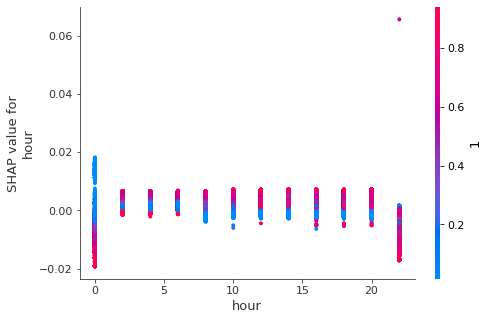

In [57]:
shap.dependence_plot("hour", shap_values, train_x_df)

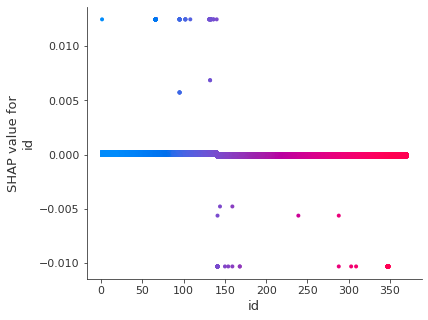

In [58]:
shap.dependence_plot("id", shap_values, train_x_df)

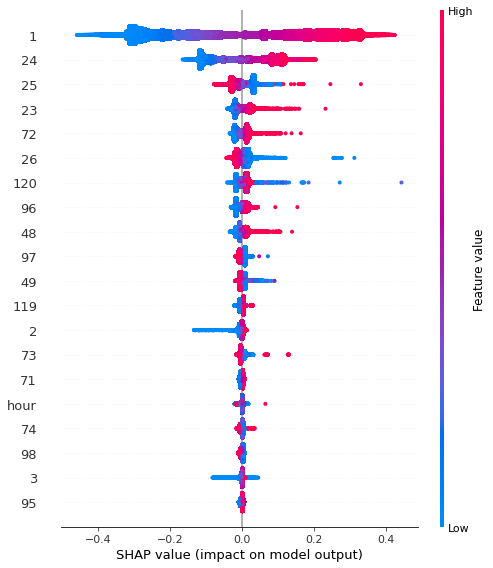

In [59]:
shap.summary_plot(shap_values, train_x_df)

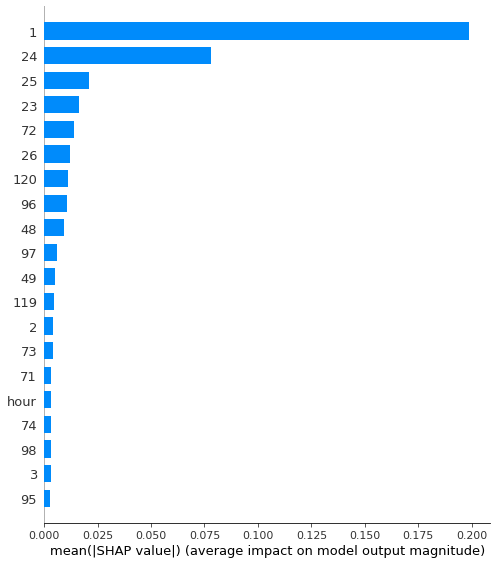

In [60]:
shap.summary_plot(shap_values, train_x_df, plot_type="bar")

# 3. 개선

In [37]:
df['id'] = df['id'].apply(lambda id: int(id[-3:]))

In [38]:
from sklearn.preprocessing import MinMaxScaler

def make_data(df, length, jump):
  x = []
  y = []

  for j in tqdm(range(len(id_list))):
    df2 = df[df['id'] == id_list[j]].reset_index()
    data_num = int((len(df2) - (length - 1))/jump)
    for i in range(data_num):
      scalar = MinMaxScaler()
      temp = scalar.fit_transform(df2['power_usage'][i*jump:i*jump+length].values.reshape(-1, 1))
      temp = np.squeeze(temp)

      x.append(temp)
      y.append(np.squeeze(scalar.transform(df2['power_usage'][i*jump+length].reshape(-1, 1))))
    
  x = np.array(x)
  y = np.array(y)
  return x, y

In [39]:
id_list = df['id'].unique()

In [40]:
length = 120
jump = 2

# train 1~7월, test 8~9월
train_x, train_y = make_data(df[df['month'] <= 7], length, jump)
test_x, test_y = make_data(df[df['month'] > 7], length, jump)

100%|██████████| 369/369 [00:41<00:00,  8.82it/s]


In [41]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(908632, 120)
(908632,)
(146124, 120)
(146124,)


In [42]:
import random

# shuffle
tmp = [[x,y] for x, y in zip(train_x, train_y)]
random.shuffle(tmp)

In [43]:
train_x = [n[0] for n in tmp]
train_y = [n[1] for n in tmp]

In [44]:
import xgboost
import time 
start = time.time() 

model = xgboost.XGBRegressor(tree_method = 'auto', objective ='reg:squarederror')
model.fit(train_x,train_y)
end = time.time() 
print(f"{end - start:.5f} sec")

1471.69608 sec


In [45]:
from sklearn.metrics import mean_squared_error

preds = model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.099230


앞선 결과랑 비교

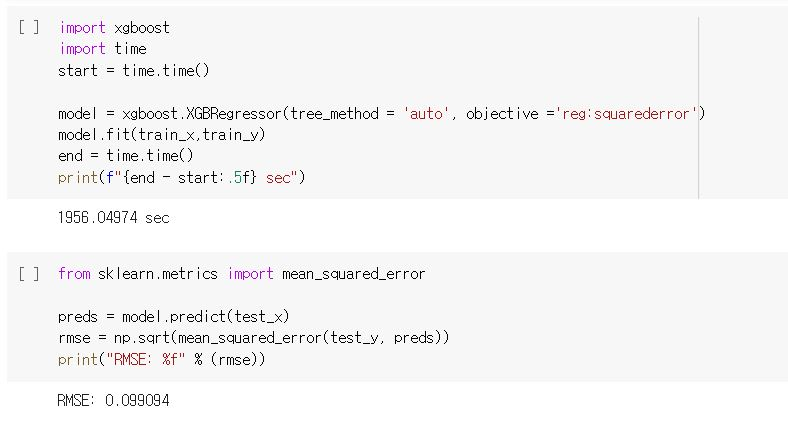

In [46]:
!pip install shap

     |████████████████████████████████| 371 kB 14.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509231 sha256=91bb714453cb5d60b0d87c454992a882d7c3fa96a4d08a9230f9394795d8a52b
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [47]:
import shap
# SHAP의 설명체를 정의하고 섀플리 값을 계산하는 로직

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_x)

In [48]:
columns = list(range(120, 0, -1))

In [49]:
train_x_df = pd.DataFrame(train_x, columns = columns)
train_x_df.head()

,120,119,118,117,116,115,114,113,112,111,110,109,108,107,106,105,104,103,102,101,100,99,98,97,96,95,94,93,92,91,90,89,88,87,86,85,84,83,82,81,...,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1
0,0.444444,0.392857,0.337302,0.420635,0.400794,0.472222,0.670635,0.952381,0.865079,0.595238,0.619048,0.531746,0.380952,0.325397,0.273810,0.154762,0.015873,0.023810,0.250000,0.329365,0.289683,0.293651,0.369048,0.301587,0.226190,0.226190,0.182540,0.166667,0.170635,0.289683,0.416667,0.527778,0.404762,0.353175,0.353175,0.273810,0.214286,0.273810,0.293651,0.273810,...,0.964286,0.587302,0.373016,0.333333,0.285714,0.253968,0.154762,0.138889,0.055556,0.456349,0.571429,0.789683,0.674603,0.678571,0.662698,0.527778,0.496032,0.539683,0.488095,0.527778,0.432540,0.329365,0.611111,1.000000,0.841270,0.535714,0.317460,0.309524,0.313492,0.301587,0.190476,0.162698,0.150794,0.448413,0.825397,0.777778,0.623016,0.666667,0.730159,0.440476
1,0.220126,0.264151,0.012579,0.157233,0.163522,0.144654,0.176101,0.345912,0.345912,0.251572,0.232704,0.188679,0.207547,0.157233,0.459119,0.610063,0.880503,1.000000,0.886792,0.603774,0.578616,0.371069,0.264151,0.251572,0.226415,0.245283,0.000000,0.157233,0.207547,0.345912,0.270440,0.314465,0.421384,0.295597,0.270440,0.213836,0.119497,0.289308,0.484277,0.911950,...,0.830189,0.553459,0.477987,0.427673,0.251572,0.496855,0.339623,0.540881,0.786164,0.930818,0.855346,0.647799,0.559748,0.415094,0.327044,0.289308,0.276730,0.371069,0.119497,0.188679,0.232704,0.308176,0.327044,0.345912,0.490566,0.358491,0.352201,0.301887,0.264151,0.226415,0.402516,0.566038,0.880503,0.830189,0.830189,0.685535,0.635220,0.440252,0.327044,0.295597
2,0.113902,0.128148,0.106805,0.190452,0.520472,0.352412,0.522731,0.732481,0.750320,1.000000,0.923325,0.882310,0.835924,0.807395,0.837721,0.900132,0.891221,0.860913,0.739595,0.670070,0.445628,0.156641,0.099691,0.112159,0.076533,0.113919,0.089001,0.558463,0.307911,0.350651,0.516772,0.677184,0.645080,0.695023,0.709306,0.718216,0.675406,0.727109,0.777070,0.793113,...,0.773495,0.869806,0.859099,0.791335,0.803838,0.834128,0.757452,0.737817,0.805617,0.896557,0.875142,0.646308,0.354190,0.103248,0.085444,0.089001,0.056951,0.096133,0.090798,0.397570,0.236714,0.420674,0.437838,0.777053,0.785981,0.876956,0.819881,0.741409,0.700377,0.787760,0.785999,0.775274,0.832349,0.784185,0.848410,0.602928,0.351238,0.128166,0.080108,0.067622
3,0.854878,0.826536,0.854878,0.819850,0.809853,0.843219,0.914940,0.921609,0.898257,0.844882,0.462227,0.076544,0.058232,0.039935,0.041599,0.049915,0.018296,0.038272,0.239679,0.403330,0.533232,0.843202,0.898257,0.924936,1.000000,0.856558,0.826536,0.841572,0.813180,0.878231,0.921609,0.911596,0.876584,0.803184,0.463857,0.049915,0.031619,0.028276,0.029956,0.000000,...,0.826536,0.763165,0.497206,0.079871,0.068211,0.063221,0.048252,0.044925,0.054905,0.063238,0.252986,0.379462,0.478294,0.743139,0.829863,0.836532,0.808190,0.844882,0.821513,0.739812,0.843219,0.901600,0.963308,0.898257,0.881574,0.751489,0.474951,0.086524,0.076544,0.068228,0.073218,0.046589,0.056568,0.059895,0.413326,0.554805,0.554838,0.723130,0.848225,0.851568
4,0.785888,0.706813,0.688970,0.690187,0.695864,0.524736,0.426602,0.246148,0.051906,0.030819,0.007299,0.017032,0.000000,0.112328,0.169911,0.214517,0.417680,0.487429,0.540146,0.545823,0.582725,0.621249,0.645174,0.675588,0.757502,0.733982,0.611111,0.590430,0.538929,0.473642,0.413220,0.267640,0.057178,0.044201,0.017843,0.031630,0.004461,0.124493,0.186942,0.195864,...,0.077859,0.063260,0.034469,0.027981,0.037713,0.150852,0.206407,0.243715,0.377534,0.527575,0.567315,0.560827,0.561233,0.613139,0.637875,0.770479,0.923358,0.673560,0.839011,0.665045,0.572993,0.556367,0.366991,0.190998,0.093674,0.085564,0.075831,0.050284,0.103001,0.159367,0.213301,0.212895,0.566099,0.654096,0.704380,0.706813,0.822384,0.666261,0.697891,1.000000


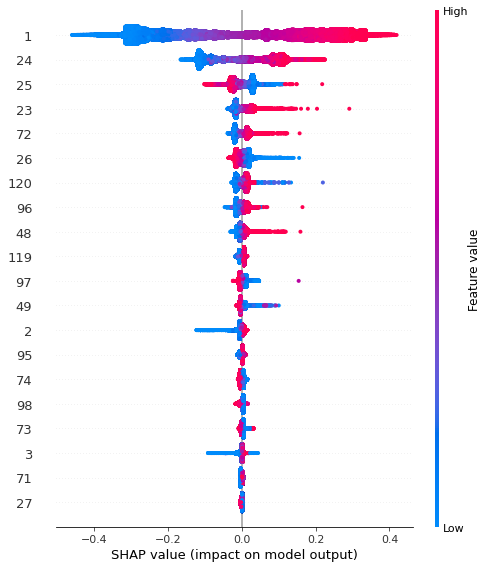

In [50]:
shap.summary_plot(shap_values, train_x_df)

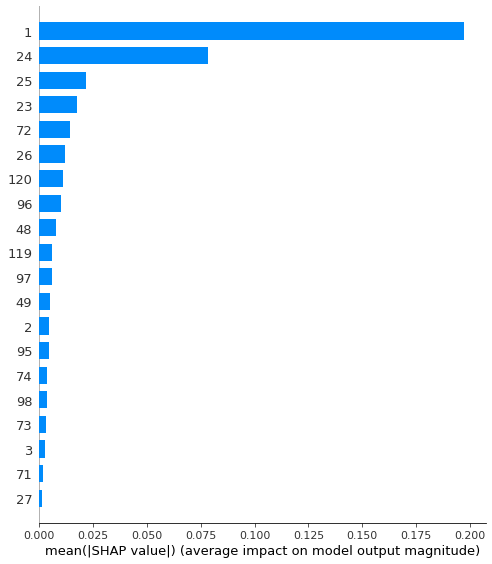

In [51]:
shap.summary_plot(shap_values, train_x_df, plot_type="bar")

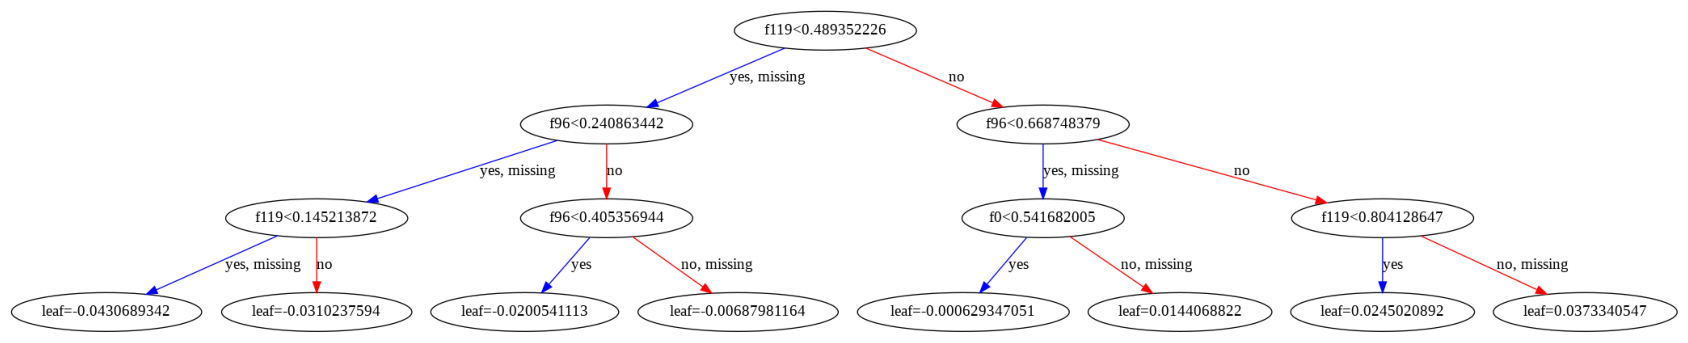

In [54]:
import os
# set graphviz path
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

# set up the parameters
rcParams['figure.figsize'] = 30,60  #rcParams는 차트를 시각화하기
# 의사 결정 트리 시각화
plot_tree(model)
plt.show()